<a href="https://colab.research.google.com/github/tashir0605/Cocepts-And-Practice/blob/main/Pytorch/NN_Module.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

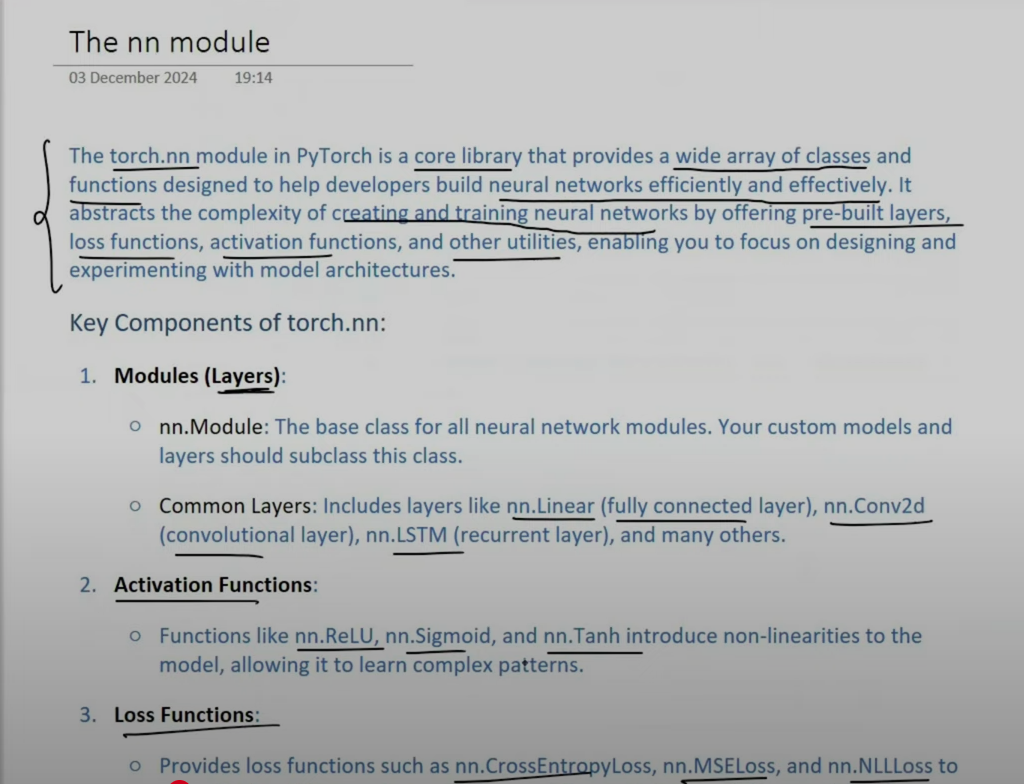

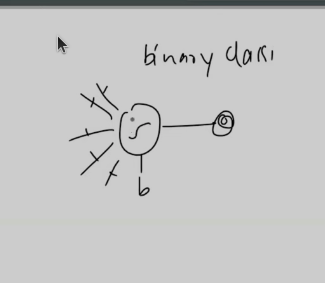

In [3]:
#create model class

import torch
import torch.nn as nn

# Your class should inherit the the nn.Modeule class se that's why you are passing nn.Module into your "Model" class.
class Model(nn.Module):
  # the below line is constructor
    def __init__(self,num_features):
      # this is child class constructor calling the parent constructor
        super(Model, self).__init__()
        # nn.linear(input me kya aa rha hai, and output kya jaa rha hai)
        # we are using the architecture in the above image linear model having one neuron
        self.linear=nn.Linear(num_features,1)
        self.sigmoid=nn.Sigmoid()


        # At last we have developed the above image architecture
    def forward(self,features):
      # the below line is calculating z , which is w*x+b
      out=self.linear(features)

      out=self.sigmoid(out)

      return out

In [4]:
#create dataset

# A datset that contain 10 rows and 5 columns as we have in the image 5 features
features=torch.rand(10,5)

#create Model

# here we will create one object of the class Model

model=Model(features.shape[1])
#Call the model
# two ways
# 1.
model.forward(features)
# 2.
model(features)




tensor([[0.6081],
        [0.5795],
        [0.5240],
        [0.5298],
        [0.5010],
        [0.5673],
        [0.5766],
        [0.5159],
        [0.5041],
        [0.6113]], grad_fn=<SigmoidBackward0>)

In [6]:
# show model weights
model.linear.weight

Parameter containing:
tensor([[-0.2913,  0.1116, -0.2019,  0.2761,  0.3562]], requires_grad=True)

In [7]:
model.linear.bias

Parameter containing:
tensor([0.0480], requires_grad=True)

In [8]:
!pip install torchinfo

In [9]:
from torchinfo import summary

summary(model, input_size=(10,5))

Layer (type:depth-idx)                   Output Shape              Param #
Model                                    [10, 1]                   --
├─Linear: 1-1                            [10, 1]                   6
├─Sigmoid: 1-2                           [10, 1]                   --
Total params: 6
Trainable params: 6
Non-trainable params: 0
Total mult-adds (Units.MEGABYTES): 0.00
Input size (MB): 0.00
Forward/backward pass size (MB): 0.00
Params size (MB): 0.00
Estimated Total Size (MB): 0.00

# Now We will make a Complex NN

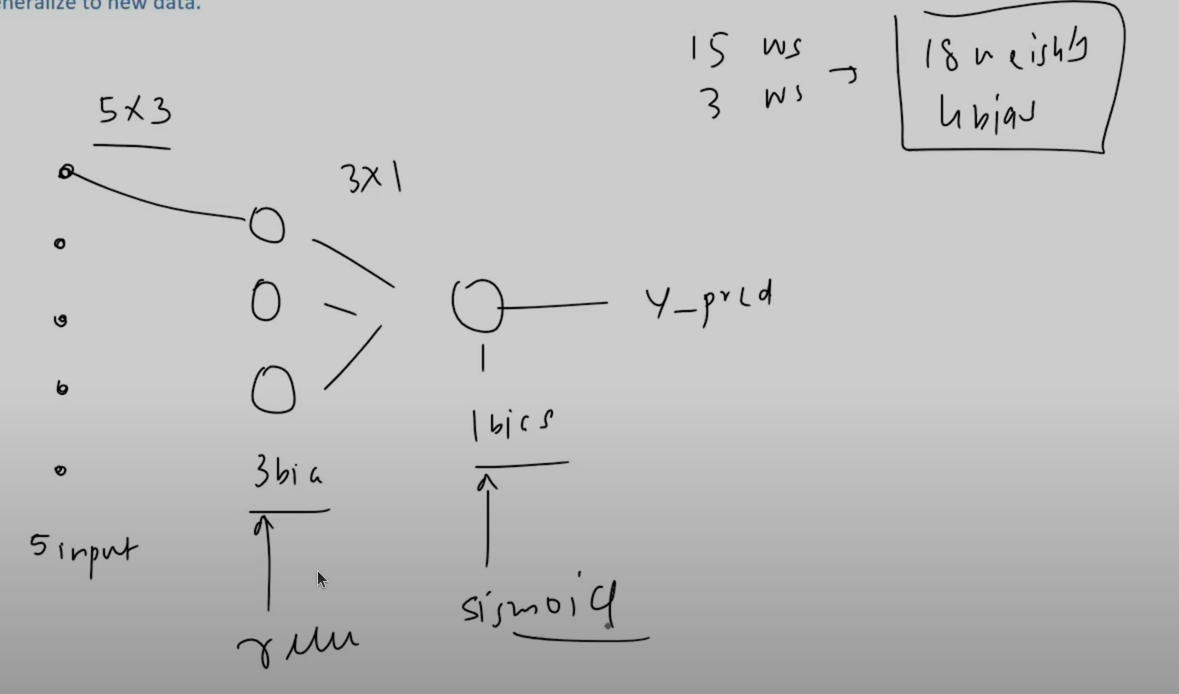

In [10]:
#create model class

import torch
import torch.nn as nn

# Your class should inherit the the nn.Modeule class se that's why you are passing nn.Module into your "Model" class.
class Model(nn.Module):
  # the below line is constructor
    def __init__(self,num_features):
      # this is child class constructor calling the parent constructor
        super(Model, self).__init__()
        # nn.linear(input me kya aa rha hai, and output kya jaa rha hai)
        # we are using the architecture in the above image linear model having one neuron
        self.linear1=nn.Linear(num_features,3)
        self.relu=nn.ReLU()
        # jo upar se output aaya mtlb 3 ouput aayenge wo 3 output as input kaam krenge for the next linear layer so that's why Linear(3,1) hai 1 isiliye kyuki ouput jo niklega uss latyer se wo ek hi output hoga as there is a single neuron
        self.linear2=nn.Linear(3,1)

        self.sigmoid=nn.Sigmoid()


        # At last we have developed the above image architecture
    def forward(self,features):
      # the below line is calculating z , which is w*x+b
      out=self.linear1(features)
      out=self.relu(out)
      out=self.linear2(out)

      out=self.sigmoid(out)

      return out

In [11]:
#create dataset

# A datset that contain 10 rows and 5 columns as we have in the image 5 features
features=torch.rand(10,5)

#create Model

# here we will create one object of the class Model

model=Model(features.shape[1])
#Call the model
# two ways
# 1.
model.forward(features)
# 2.
model(features)


tensor([[0.4029],
        [0.4026],
        [0.4271],
        [0.4197],
        [0.4022],
        [0.4025],
        [0.4057],
        [0.4174],
        [0.4114],
        [0.4024]], grad_fn=<SigmoidBackward0>)

In [13]:
# show model weights
model.linear1.weight

Parameter containing:
tensor([[-0.1915, -0.2839,  0.1526,  0.1492, -0.2032],
        [ 0.0231,  0.3386, -0.2722, -0.0742, -0.0293],
        [ 0.2266,  0.1429, -0.0068, -0.3639,  0.4103]], requires_grad=True)

In [14]:
# show model weights
model.linear2.weight

Parameter containing:
tensor([[-0.1204,  0.5326, -0.0090]], requires_grad=True)

In [15]:
# show model bias
model.linear1.bias

Parameter containing:
tensor([-0.2448, -0.0388,  0.2763], requires_grad=True)

In [16]:
# show model bias
model.linear2.bias

Parameter containing:
tensor([-0.3911], requires_grad=True)

In [17]:
from torchinfo import summary

summary(model, input_size=(10,5))

Layer (type:depth-idx)                   Output Shape              Param #
Model                                    [10, 1]                   --
├─Linear: 1-1                            [10, 3]                   18
├─ReLU: 1-2                              [10, 3]                   --
├─Linear: 1-3                            [10, 1]                   4
├─Sigmoid: 1-4                           [10, 1]                   --
Total params: 22
Trainable params: 22
Non-trainable params: 0
Total mult-adds (Units.MEGABYTES): 0.00
Input size (MB): 0.00
Forward/backward pass size (MB): 0.00
Params size (MB): 0.00
Estimated Total Size (MB): 0.00

# Sequencial Method to define a Neural Network

In [18]:
# create model class
import torch
import torch.nn as nn

class Model(nn.Module):

  def __init__(self, num_features):

    super().__init__()
    self.network = nn.Sequential(
        nn.Linear(num_features, 3),
        nn.ReLU(),
        nn.Linear(3, 1),
        nn.Sigmoid()
    )

  def forward(self, features):

    out = self.network(features)

    return out

In [19]:
# create dataset
features = torch.rand(10,5)

# create model
model = Model(features.shape[1])

# call model for forward pass
# model.forward(features)
model(features)

tensor([[0.3971],
        [0.3756],
        [0.4028],
        [0.3910],
        [0.3924],
        [0.3528],
        [0.3727],
        [0.3779],
        [0.3806],
        [0.3806]], grad_fn=<SigmoidBackward0>)

In [22]:
# show model weights
model.Linear.weight

AttributeError: 'Model' object has no attribute 'Linear'